# Plotting and Visualization

Labeled data enables expressive computations. These same labels can also be used to easily create informative plots.

xarray plotting functionality is a thin wrapper around the popular matplotlib library. Matplotlib syntax and function names were copied as much as possible, which makes for an easy transition between the two.

### Outline
- Matplotlib Integration
- Maps using Cartopy
- Extensions using Bokeh/Holoviews/Geoviews

### Tutorial Duriation
10 minutes

### Going Further

Xarray's Documentation on Plotting: http://xarray.pydata.org/en/latest/plotting.htm


In [1]:
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt


# load some tutorial data
ds = xr.tutorial.load_dataset('air_temperature')

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Plotting 1d data

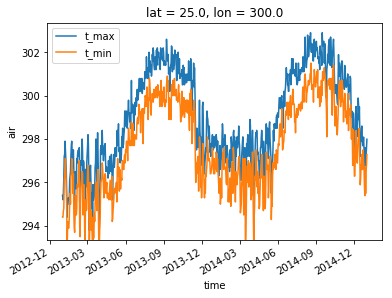

In [2]:
da_point_resample = ds['air'].isel(lat=20, lon=40).resample(time='1D')

t_max = da_point_resample.max('time')
t_min = da_point_resample.min('time')
t_max.plot(label='t_max')
t_min.plot(label='t_min')
plt.legend()

## Plotting 2d Data

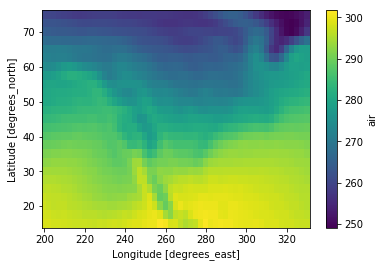

In [3]:
t_mean = ds['air'].mean('time')

t_mean.plot()

## Plotting >2d Data

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <a list of 10 Patch objects>)

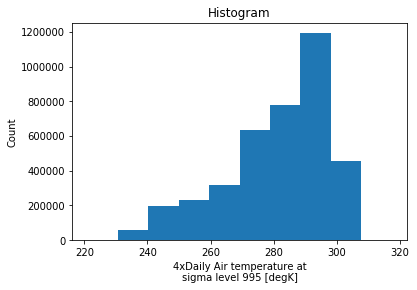

In [4]:
ds['air'].plot()

## FacetGrid Plots

In [5]:
# Calculate some seasonal anomalies

da_month = ds['air'].resample(time='QS-Dec').mean('time')

climatology = da_month.groupby('time.season').mean('time')
anomalies = da_month.groupby('time.season') - climatology
anomalies

<xarray.DataArray 'air' (time: 9, lat: 25, lon: 53)>
array([[[-3.773804, -3.678513, ...,  0.694107,  0.511429],
        [-3.474045, -3.666229, ...,  0.360214, -0.020752],
        ...,
        [-0.704315, -0.852051, ..., -0.583862, -0.642242],
        [-0.715424, -0.850372, ..., -0.569336, -0.589539]],

       [[-1.346527, -1.386505, ...,  0.275513,  0.253067],
        [-1.623169, -1.677673, ...,  0.34256 ,  0.185089],
        ...,
        [-0.185394, -0.185577, ...,  0.637665,  0.635193],
        [-0.167633, -0.191406, ...,  0.611938,  0.589539]],

       ...,

       [[ 0.904022,  0.800323, ...,  0.871872,  0.839523],
        [ 0.238525,  0.049438, ...,  1.4216  ,  1.492126],
        ...,
        [ 0.464142,  0.478058, ...,  0.009064, -0.012024],
        [ 0.452423,  0.437134, ..., -0.037537, -0.024811]],

       [[ 0.332367,  0.4272  , ..., -1.304581, -1.535797],
        [-0.378113, -0.037628, ..., -1.495529, -1.767532],
        ...,
        [ 0.473602,  0.563446, ...,  1.30896 ,  1.

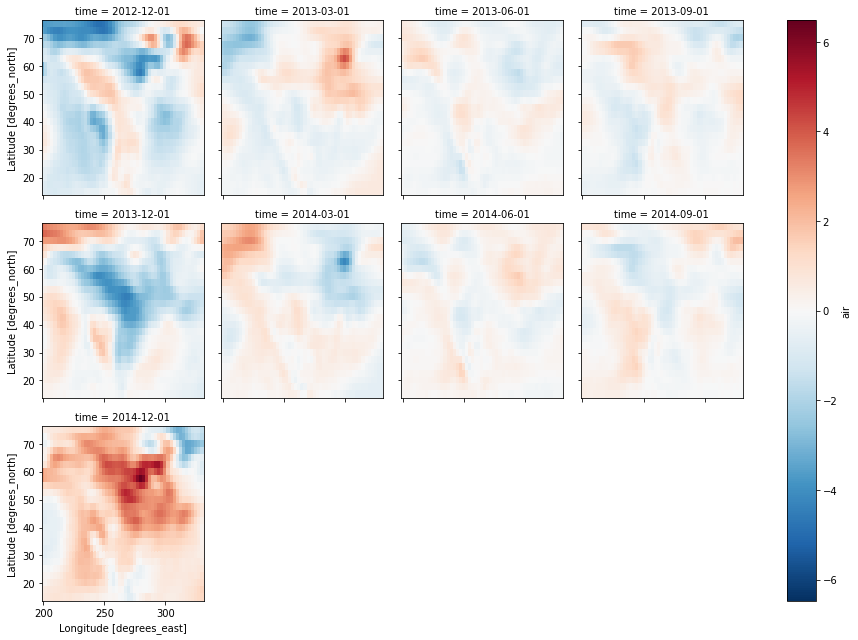

In [6]:
anomalies.plot(col='time', col_wrap=4)

## Plotting maps using Cartopy

In [7]:
import cartopy.crs as ccrs

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


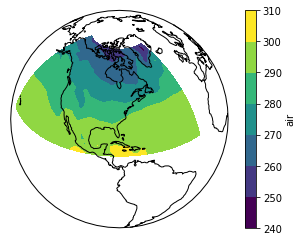

In [8]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
t_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

## Plotting using Holoviews and Geoviews

In [9]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

hv.notebook_extension()


ModuleNotFoundError: No module named 'holoviews'

In [ ]:
# initialize the holoviews dataset
ds_hv = hv.Dataset(t_mean)
ds_hv

In [ ]:
# make a plot with holoviews
%opts Image [colorbar=True fig_size=200] (cmap='viridis')
ds_hv.to(hv.Image, ['lon', 'lat'])

In [ ]:
# repeat the same steps but now use geoviews
%opts Image [colorbar=True fig_size=200] (cmap='viridis')
ds_hv.to(gv.Image, ['lon', 'lat'], ['air'], ['time']) * gf.coastline()

In [ ]:
# This may require the legacy notebook interface?
%opts Image [colorbar=True fig_size=200] (cmap='RdBu_r')
ds_hv2 = hv.Dataset(anomalies)
ds_hv2.to(gv.Image, ['lon', 'lat'], ['air'], ['time']) * gf.coastline()